In [365]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
from IPython.display import display

data_cuaca = pd.read_csv("./data_cuaca.csv")
df_cuaca = pd.DataFrame(data_cuaca)
data_kecamatan = pd.read_csv("./data_kecamatan.csv")
df_kecamatan = pd.DataFrame(data_kecamatan)

In [366]:
# Merge data berdasarkan Kode
df_merged = pd.merge(data_cuaca, data_kecamatan, left_on="Kode", right_on="Kode")

In [367]:

df_merged = df_merged['Kode Cuaca'].value_counts().sort_index().reset_index()
df_merged.columns = ['Kode Cuaca', 'Frekuensi']

kode_cuaca = {
    0: 'Cerah / Clear Skies',
    1: 'Cerah Berawan / Partly Cloudy',
    2: 'Cerah Berawan / Partly Cloudy',
    3: 'Berawan / Mostly Cloudy',
    4: 'Berawan Tebal / Overcast',
    5: 'Udara Kabur / Haze',
    10: 'Asap / Smoke',
    45: 'Kabut / Fog',
    60: 'Hujan Ringan / Light Rain',
    61: 'Hujan Sedang / Rain',
    63: 'Hujan Lebat / Heavy Rain',
    80: 'Hujan Lokal / Isolated Shower',
    95: 'Hujan Petir / Severe Thunderstorm',
    97: 'Hujan Petir / Severe Thunderstorm'
}

df_merged['Kode Cuaca'] = df_merged['Kode Cuaca'].map(kode_cuaca)

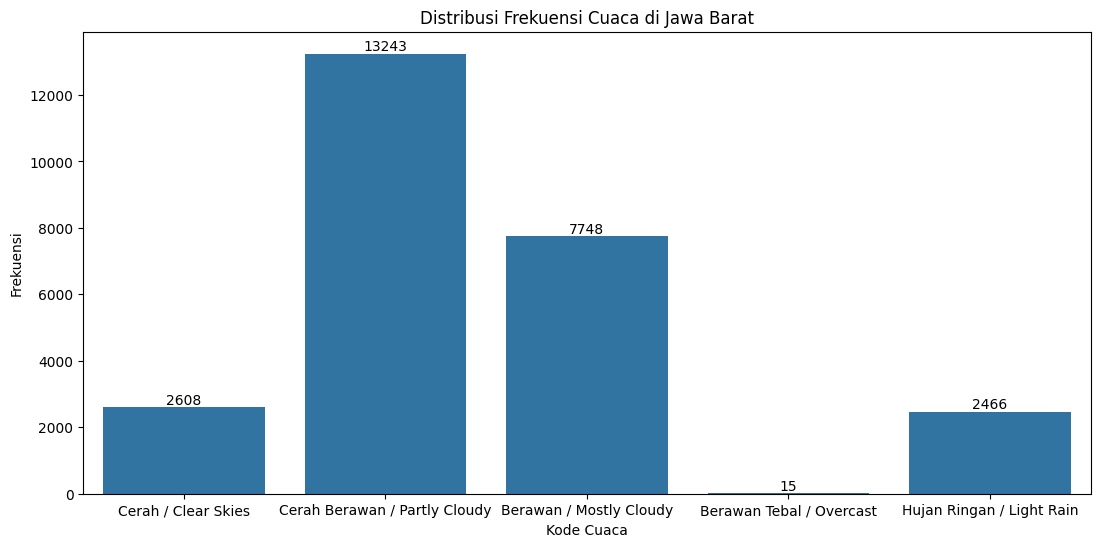

                      Kode Cuaca  Frekuensi
0            Cerah / Clear Skies       2608
1  Cerah Berawan / Partly Cloudy      13243
2        Berawan / Mostly Cloudy       7748
3       Berawan Tebal / Overcast         15
4      Hujan Ringan / Light Rain       2466


In [368]:
plt.figure(figsize=(13, 6))
plt.title("Distribusi Frekuensi Cuaca di Jawa Barat")
sns.barplot(data=df_merged, x="Kode Cuaca", y="Frekuensi")
for i, value in enumerate(df_merged['Frekuensi']):
    plt.text(i, value + 0.01, f'{value:}', ha='center', va='bottom')
plt.show()
print(df_merged)

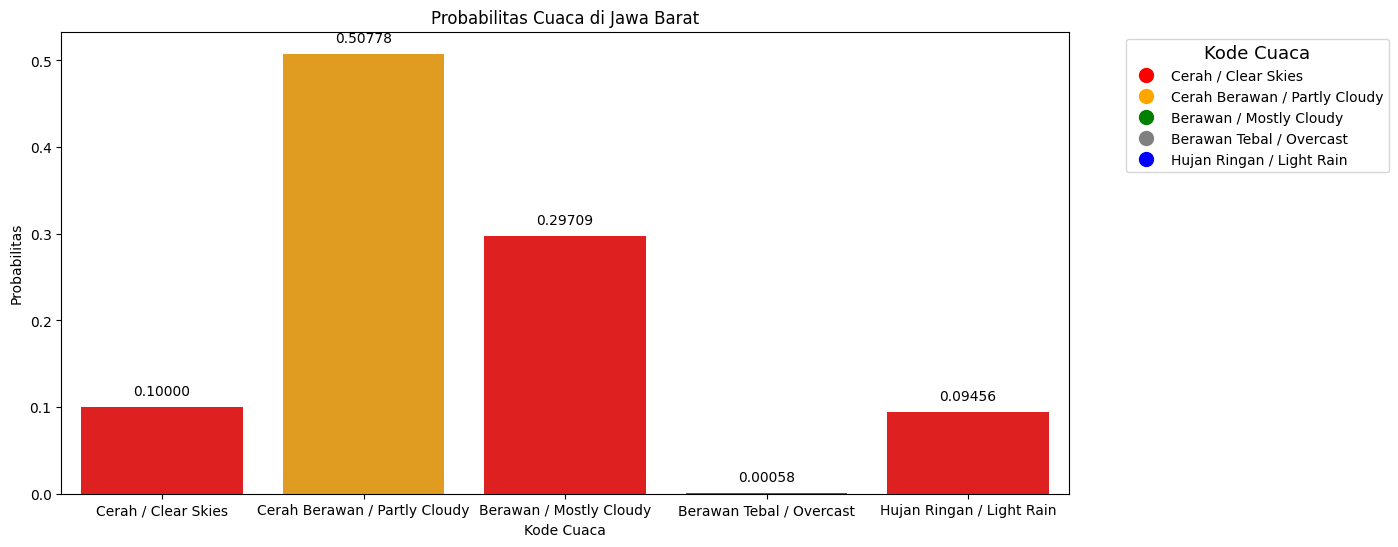

                      Kode Cuaca  Frekuensi  Probabilitas
0            Cerah / Clear Skies       2608      0.100000
1  Cerah Berawan / Partly Cloudy      13243      0.507784
2        Berawan / Mostly Cloudy       7748      0.297086
3       Berawan Tebal / Overcast         15      0.000575
4      Hujan Ringan / Light Rain       2466      0.094555


In [369]:
total_data = df_merged["Frekuensi"].sum()
df_merged['Probabilitas'] = df_merged['Frekuensi'] / total_data

plt.figure(figsize=(13, 6))
plt.title("Probabilitas Cuaca di Jawa Barat")
colors = ['red' if prob < 0.5 else 'orange' if prob < 1.0 else 'green' for prob in df_merged['Probabilitas']]
sns.barplot(data=df_merged, x="Kode Cuaca", y="Probabilitas", palette=colors, hue="Kode Cuaca")

for i, value in enumerate(df_merged['Probabilitas']):
    plt.text(i, value + 0.01, f'{value:.5f}', ha='center', va='bottom')

legend_labels = ['Cerah / Clear Skies', 'Cerah Berawan / Partly Cloudy', 'Berawan / Mostly Cloudy', 'Berawan Tebal / Overcast', 'Hujan Ringan / Light Rain']
legend_colors = ['red', 'orange', 'green', 'gray', 'blue']  # Sesuaikan warna dengan kategori
legend_handles = [Line2D([0], [0], marker='o', color=color, label=label, linestyle='None', markersize=10) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles, title='Kode Cuaca', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()
print(df_merged)
